In [1]:
import sequentialGOF as gof

In [24]:
ns = gof.Simulation(gof.NormalSequence(0, 1), gof.NormalSequence(1, 1), 50, 200, 25, 25)
ns2 = gof.Simulation(gof.NormalSequence(0, 1), gof.NormalSequence(1, 1), 50, 500, 25, 25)

In [25]:
knn = gof.KnnRegressor(variables=['x'])

In [26]:
ns.test(knn, B = 200, progress_bar=True)
ns2.test(knn, B = 200, progress_bar=True)

In [27]:
ns.prior_adjusted_cross_entropy()

0.4848309302971689

In [28]:
ns2.prior_adjusted_cross_entropy()

0.5596633744441053

In [7]:
from sklearn.metrics import log_loss, brier_score_loss, zero_one_loss

In [35]:
zero_one_loss(ns.data.evaluation[ns.data.evaluation['Y'] == 1]['Y'], ns.data.evaluation[ns.data.evaluation['Y'] == 1]['adjusted_prob_est'] > 0.5)

0.19999999999999996

In [36]:
zero_one_loss(ns.data.evaluation[ns.data.evaluation['Y'] == 0]['Y'], ns.data.evaluation[ns.data.evaluation['Y'] == 0]['adjusted_prob_est'] > 0.5)

0.28

In [37]:
zero_one_loss(ns2.data.evaluation[ns2.data.evaluation['Y'] == 1]['Y'], ns2.data.evaluation[ns2.data.evaluation['Y'] == 1]['adjusted_prob_est'] > 0.5)

0.24

In [38]:
zero_one_loss(ns2.data.evaluation[ns2.data.evaluation['Y'] == 0]['Y'], ns2.data.evaluation[ns2.data.evaluation['Y'] == 0]['adjusted_prob_est'] > 0.5)

0.16000000000000003

In [9]:
ns2.data.evaluation[ns.data.evaluation['Y'] == 1]['adjusted_prob_est']

KeyError: 'adjusted_prob_est'

<AxesSubplot:xlabel='x', ylabel='imp_score'>

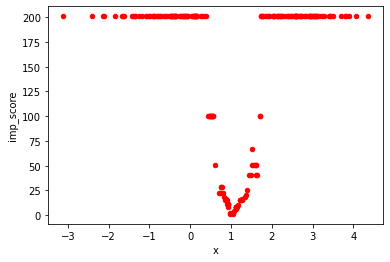

In [10]:
ns.data.evaluation.plot(kind='scatter',x='x',y='imp_score',color='red')

In [21]:
(np.array([1, 2, 3, 4, 5, 6]) < 4).astype(int)*2 - 1

array([ 1,  1,  1, -1, -1, -1])

In [3]:
real = a.draw(250).extract_overlap(1)
fake = b.draw(250).extract_overlap(1)

In [4]:
ttd = gof.TrainTestData(real, fake, 200, 200)

In [5]:
knn = gof.KnnRegressor(variables=['x'])

In [6]:
ns = gof.NormalSimulation(0, 1, 2, 1, 100, 100, 100, 100, L = 1)

In [9]:
bah = ns.test(knn)

In [11]:
bah.training

,x,Y
0,0.339149,1
1,2.441539,1
2,1.921366,1
3,2.654115,1
4,2.220975,1
...,...,...
195,2.881300,0
196,0.751020,0
197,2.717564,0
198,1.686104,0


In [13]:
import numpy as np
n = 70
[2**ii+1 for ii in range(3, int(np.log2(n)+1))]

[9, 17, 33, 65]

In [17]:
import numpy as np

In [39]:
from sklearn.metrics import log_loss
t = [1, 0, 1, 1, 0, 1, 0, 1]
p = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
log_loss(t, p)

0.6931471805599453

In [41]:
import numpy as np
t = np.concatenate((np.ones(25), np.zeros(25)))

In [43]:
p = [0.41176471, 0.23529412, 0.35294118, 0.05882353, 0.82352941, 0.82352941, 0.82352941, 0.35294118, 0.52941176,
0.76470588, 0.82352941, 0.35294118, 0.94117647, 0.29411765, 0.47058824, 0.23529412, 0.17647059, 0.76470588,
0.35294118, 0.47058824, 0.29411765, 0.52941176, 0.88235294, 0.47058824, 0.00000000, 0.23529412, 0.17647059,
0.41176471, 0.05882353, 0.17647059, 0.17647059, 0.00000000, 0.00000000, 0.35294118, 0.29411765, 0.35294118,
0.88235294, 0.05882353, 0.05882353, 0.35294118, 0.00000000, 0.47058824, 0.00000000, 0.23529412, 0.00000000,
0.00000000, 0.23529412, 0.00000000, 0.05882353, 0.17647059]

In [49]:
log_loss(t, p)

1.2263637917878956

In [2]:
import pomegranate as pom

In [4]:
trans_mat = {
    '00,0': 0.125,
    '00,1': 0.875,
    '10,0': 0.875,
    '10,1': 0.125,
    '01,0': 0.5,
    '01,1': 0.5,
    '11,0': 0.5,
    '11,1': 0.5
}

In [8]:
trans_mat['00,0'] + trans_mat['00,1']
trans_mat['10,0'] + trans_mat['10,1']
trans_mat['01,0'] + trans_mat['01,1']
trans_mat['11,0'] + trans_mat['11,1']

1.0

In [ ]:
trans_mat['0,1'] = trans_mat['00,1'] + trans_mat['10,1']

In [9]:
d1 = pom.DiscreteDistribution({'1': 0.5, '0': 0.5})

d2 = pom.ConditionalProbabilityTable([['1', '1', 0.5],
                                      ['1', '0', 0.5],
                                      ['0', '1', 0.5],
                                      ['0', '0', 0.5]], [d1])

d3 = pom.ConditionalProbabilityTable([['1', '1', '1', 0.5],
                                      ['1', '1', '0', 0.5],
                                      ['1', '0', '1', 0.125],
                                      ['1', '0', '0', 0.875],
                                      ['0', '1', '1', 0.5],
                                      ['0', '1', '0', 0.5],
                                      ['0', '0', '1', 0.875],
                                      ['0', '0', '0', 0.125]], [d1, d2])

mc_real = pom.MarkovChain([d1, d2, d3])

In [71]:
samp = [mc_real.sample(100)[25:] for i in range(20)]

In [10]:
samp = mc_real.sample(100)[25:]

In [16]:
import numpy as np

In [18]:
np.array(list(map(int, samp)))

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1])

In [75]:
mc_fit = pom.MarkovChain.from_samples(samp, k = 1)

In [73]:
mc_real.distributions[2].to_dict()['table']

[['1', '1', '1', '0.5'],
 ['1', '1', '0', '0.5'],
 ['1', '0', '1', '0.12500000000000003'],
 ['1', '0', '0', '0.875'],
 ['0', '1', '1', '0.5'],
 ['0', '1', '0', '0.5'],
 ['0', '0', '1', '0.875'],
 ['0', '0', '0', '0.12500000000000003']]

In [77]:
mc_fit.distributions[1].to_dict()['table']

[['0', '0', '0.496513249651325'],
 ['0', '1', '0.5034867503486751'],
 ['1', '0', '0.47313237221494103'],
 ['1', '1', '0.526867627785059']]

In [1]:
import sequentialGOF as seq

In [2]:
a = seq.MarkovChain()

In [9]:
ls = a.draw(1500, burnin=50)


In [10]:
b = seq.MCTrain([ls.data], order = 2)

In [11]:
b.get_trans_matrix(order = 2)

[['0', '0', '0', '0.10512129380053908'],
 ['0', '0', '1', '0.894878706199461'],
 ['0', '1', '0', '0.5039370078740157'],
 ['0', '1', '1', '0.49606299212598426'],
 ['1', '0', '0', '0.8713910761154856'],
 ['1', '0', '1', '0.12860892388451445'],
 ['1', '1', '0', '0.5150684931506849'],
 ['1', '1', '1', '0.4849315068493151']]

In [1]:
import sequentialGOF as gof
import numpy as np
import pandas as pd

In [2]:
real_MC = gof.MarkovChain()
emulated_MC = gof.MarkovChain(order = 1)

In [3]:
Z = real_MC.draw(200)
S = Z.extract_overlap(3)

In [30]:
S.iloc[27]

x      0
x-1    0
x-2    0
Name: 27, dtype: int64

In [29]:
real_MC.true_probabilities(S, emulated_MC, 0.5)[27]

0.2

In [19]:
np.exp(real_MC.chain.log_probability(['0', '1', '0']))

0.12500000000000003

In [12]:
real_MC.get_trans_matrix()

[['1', '1', '1', '0.5'],
 ['1', '1', '0', '0.5'],
 ['1', '0', '1', '0.12500000000000003'],
 ['1', '0', '0', '0.875'],
 ['0', '1', '1', '0.5'],
 ['0', '1', '0', '0.5'],
 ['0', '0', '1', '0.875'],
 ['0', '0', '0', '0.12500000000000003']]

In [10]:
[str(y) for y in S.iloc[0][::-1]]

['1', '0', '0']

In [2]:
real_n = gof.NormalSequence(0, 1)
emu_n = gof.NormalSequence(1, 1)

In [3]:
Z = real_n.draw(200)
S = Z.extract_overlap(1)

In [ ]:
import scipy.stats
def m_post(row):
    p_x_given_1 = scipy.stats.norm.pdf(row, loc = self.mu, scale = self.sigma)[0]
    p_x_given_0 = scipy.stats.norm.pdf(row, loc = emulator_dist.mu, scale = emulator_dist.sigma)[0]
    return (p_x_given_1 * pi)/(p_x_given_1 * pi + p_x_given_0 * (1 - pi))

In [5]:
float(np.array([0.23555]))

0.23555

In [5]:
a = real_n.true_probabilities(S, emu_n, 0.5)

In [8]:
real_MC.true_probabilities(S, emulated_MC, 0.5)

array([0.5       , 0.5       , 0.63636364, 0.63636364, 0.5       ,
       0.2       , 0.5       , 0.63636364, 0.63636364, 0.5       ,
       0.5       , 0.63636364, 0.63636364, 0.5       , 0.63636364,
       0.63636364, 0.5       , 0.63636364, 0.63636364, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.63636364, 0.63636364, 0.5       , 0.63636364,
       0.63636364, 0.5       , 0.5       , 0.63636364, 0.63636364,
       0.5       , 0.63636364, 0.63636364, 0.5       , 0.2       ,
       0.5       , 0.5       , 0.5       , 0.63636364, 0.63636364,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.63636364, 0.63636364, 0.5       , 0.5       , 0.5       ,
       0.63636364, 0.63636364, 0.5       , 0.2       , 0.5       ,
       0.2       , 0.5       , 0.5       , 0.63636364, 0.2       ,
       0.2       , 0.63636364, 0.5       , 0.5       , 0.63636364,
       0.63636364, 0.5       , 0.63636364, 0.63636364, 0.5    

In [47]:
np.array(S.apply(m_post, axis = 1, pi = 0.5))

array([0.5       , 0.5       , 0.2       , 0.5       , 0.63636364,
       0.63636364, 0.5       , 0.2       , 0.5       , 0.5       ,
       0.63636364, 0.63636364, 0.5       , 0.63636364, 0.2       ,
       0.63636364, 0.5       , 0.63636364, 0.63636364, 0.5       ,
       0.2       , 0.5       , 0.63636364, 0.63636364, 0.5       ,
       0.5       , 0.63636364, 0.63636364, 0.5       , 0.5       ,
       0.5       , 0.5       , 0.63636364, 0.63636364, 0.5       ,
       0.63636364, 0.2       , 0.63636364, 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.63636364, 0.63636364,
       0.5       , 0.63636364, 0.63636364, 0.5       , 0.5       ,
       0.5       , 0.63636364, 0.63636364, 0.5       , 0.5       ,
       0.63636364, 0.63636364, 0.5       , 0.5       , 0.2       ,
       0.5       , 0.5       , 0.2       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.63636364, 0.63636364, 0.5       , 0.63636364, 0.63636

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, graphics, pacf
import numpy as np
import matplotlib.pyplot as plt

import sequentialGOF as gof
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
ar = np.array([1, -0.7])
ar_fake = np.array([1, 0.7])
L = 8
ma = np.array([1])

data = ArmaProcess(ar, ma).generate_sample(nsample = 1000, burnin = 50, scale = np.sqrt(1 - ar[1]**2)) # Scale makes it so the process has variance 1
ls = gof.LongSequence(data)
s = ls.extract_overlap(L)
s['Y'] = 1

data_fake = ArmaProcess(ar_fake, ma).generate_sample(nsample=1000, burnin = 50, scale = np.sqrt(1 - ar_fake[1]**2)) # Scale makes it so the process has variance 1
ls_fake = gof.LongSequence(data_fake)
s_fake = ls_fake.extract_overlap(L)
s_fake['Y'] = 0

s_all = pd.concat([s, s_fake], ignore_index=True)

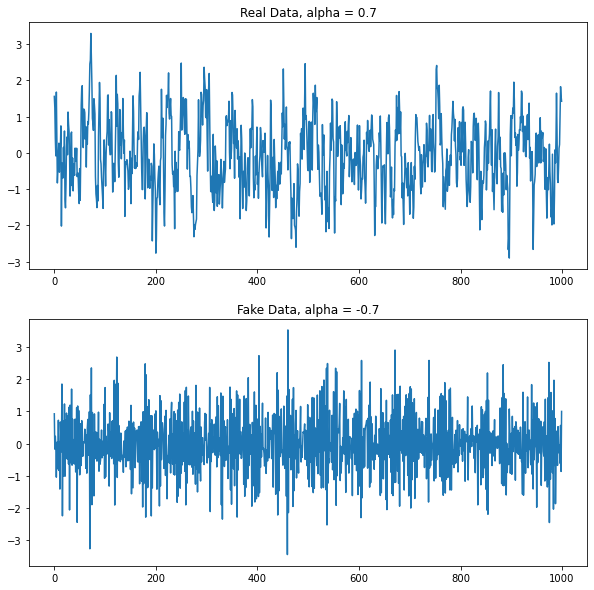

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
ax[0].plot(data)
ax[0].set_title(f"Real Data, alpha = {-ar[1]}")
ax[1].plot(data_fake)
ax[1].set_title(f"Fake Data, alpha = {-ar_fake[1]}")
plt.show()

In [206]:
mod = AutoReg(data, 1)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(1)   Log Likelihood               -1478.615
Method:               Conditional MLE   S.D. of innovations              1.063
Date:                Fri, 11 Feb 2022   AIC                           2963.229
Time:                        15:47:52   BIC                           2977.949
Sample:                             1   HQIC                          2968.824
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0580      0.035     -1.663      0.096      -0.126       0.010
y.L1           0.9164      0.013     72.281      0.000       0.892       0.941
                                    Roots           

In [5]:
# Do PCA
seq = s.drop('Y', axis = 1)
X_seq = seq - seq.mean(axis = 0)
s_pca = PCA(n_components=2).fit(X_seq)

In [6]:
s_pca.explained_variance_ratio_.cumsum()

array([0.49124493, 0.70156176])

In [7]:
s_trans = s_pca.transform(X_seq).transpose()

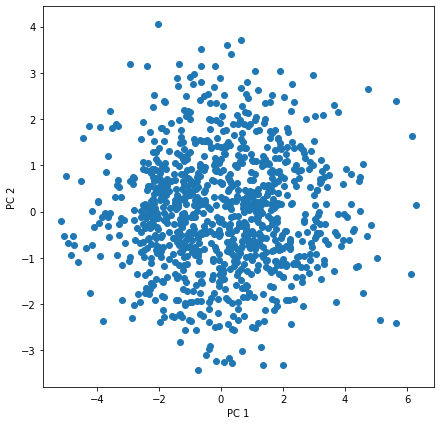

In [8]:
plt.figure(figsize = (7, 7))
plt.scatter(s_trans[0], s_trans[1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [9]:
s_1 = s.loc[s_trans[1] < -2].sample(frac = 1)
s_2 = s.loc[s_trans[1] > 2].sample(frac = 1)
s_split = [s_1, s_2]

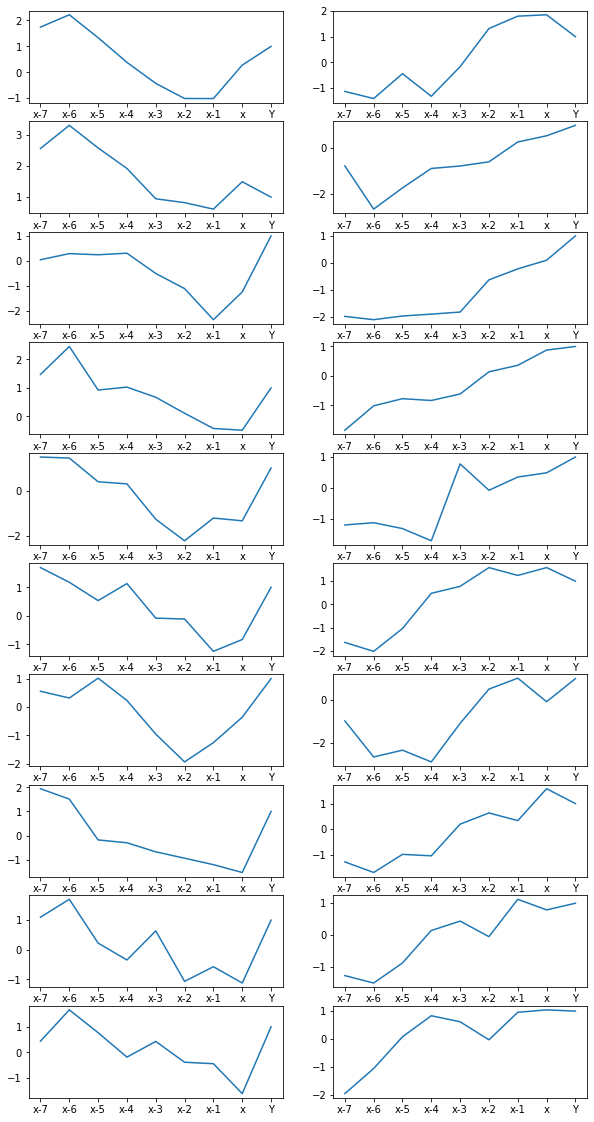

In [10]:
fig, ax = plt.subplots(10, 2, figsize = (10, 20))
for ii in range(10):
    for jj in range(2):
        ax[ii, jj].plot(s_split[jj].iloc[ii])
plt.show()

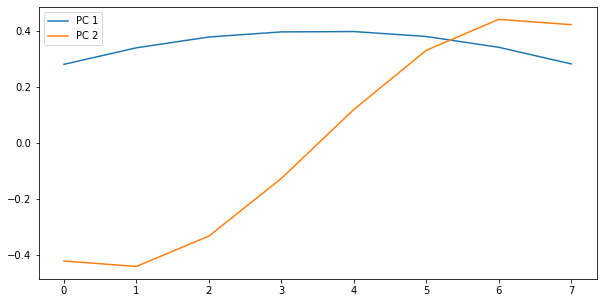

In [11]:
plt.figure(figsize = (10, 5))
plt.plot(s_pca.components_[0], label = 'PC 1')
plt.plot(s_pca.components_[1], label = 'PC 2')
plt.legend()
plt.show()

* PC1 roughly encodes whether the sequence is above or below zero. 
* PC2 roughly encodes whether the sequence is increasing or decreasing.

## Testing time series classification

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from pyts.classification import TimeSeriesForest

In [243]:
X_train, X_test, y_train, y_test = train_test_split(s_all.drop('Y', axis = 1), s_all.Y, test_size = 0.25, random_state = 42)

In [248]:
rf = TimeSeriesForest(min_samples_split = 30).fit(X_train, y_train)

In [249]:
accuracy_score(y_test, rf.predict(X_test))

0.7540322580645161

In [250]:
from sklearn.neural_network import MLPClassifier

In [265]:
mlp = MLPClassifier(hidden_layer_sizes = (50, 50, 50), activation = 'relu', max_iter = 10000, n_iter_no_change = 10, alpha = 0.1).fit(X_train, y_train)

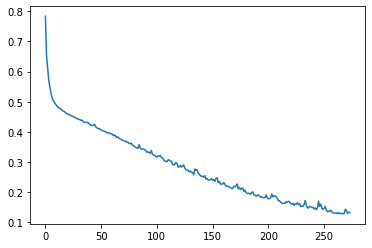

In [266]:
plt.plot(mlp.loss_curve_)

In [267]:
accuracy_score(y_test, mlp.predict(X_test))

0.7056451612903226

In [268]:
accuracy_score(y_train, mlp.predict(X_train))

0.9912516823687753

In [12]:
# Try based on estimted autocorrelation
acf_est = np.array([acf(s.drop('Y', axis = 1).iloc[ii], nlags = 2)[1:3] for ii in range(len(s))])

In [13]:
s[['ac_1', 'ac_2']] = acf_est

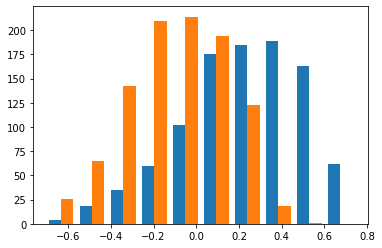

In [14]:
plt.hist(acf_est)
plt.show()

In [15]:
acf_est_fake = np.array([acf(s_fake.drop('Y', axis = 1).iloc[ii], nlags = 2)[1:3] for ii in range(len(s_fake))])

In [16]:
s_fake[['ac_1', 'ac_2']] = acf_est_fake

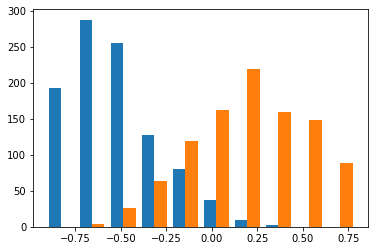

In [17]:
plt.hist(acf_est_fake)
plt.show()

In [18]:
s_all = pd.concat([s, s_fake], ignore_index=True)

<AxesSubplot:xlabel='ac_1', ylabel='ac_2'>

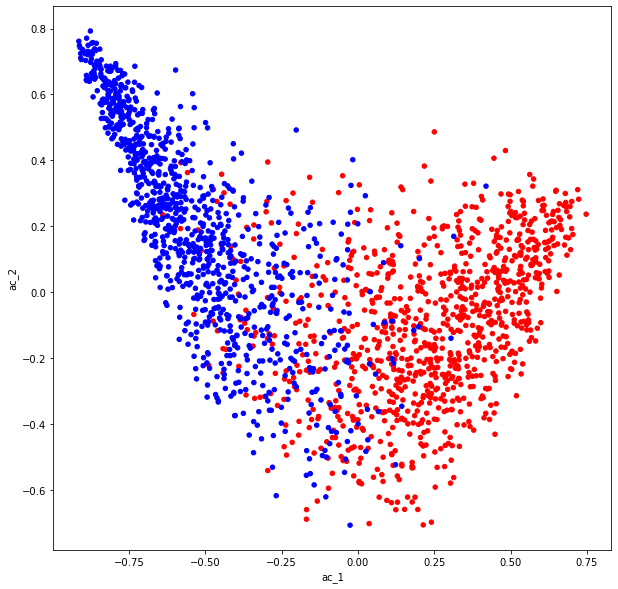

In [19]:
s_all.plot.scatter(x = 'ac_1', y = 'ac_2', c = s_all['Y'].map({0:'b', 1:'r'}), figsize = (10, 10))

In [102]:
from sklearn.linear_model import LogisticRegression

In [133]:
X_train, X_test, y_train, y_test = train_test_split(s_all.drop('Y', axis = 1), s_all.Y, test_size = 0.25, random_state = 42)

In [134]:
X_train

,x,x-1,x-2,x-3,x-4,x-5,x-6,x-7,ac_1,ac_2
170,0.113933,0.489785,0.329792,0.817791,1.607131,1.901972,1.602861,-0.754032,0.168452,-0.185340
292,1.692265,0.038636,0.583608,1.121957,1.784529,-0.277697,0.331498,0.056550,-0.152938,-0.161507
552,0.753822,-0.711664,-0.592128,0.661677,1.657715,1.442671,0.081631,0.916629,0.293120,-0.320999
1058,-1.416686,1.077108,0.113772,0.550414,-0.378940,1.141927,-1.170853,1.481614,-0.644361,0.344401
300,0.457931,1.757119,0.341329,-1.190911,-0.793442,0.380036,1.021869,-0.717328,0.148381,-0.515844
...,...,...,...,...,...,...,...,...,...,...
1130,-1.088124,0.420748,-1.154015,1.774698,-1.019661,0.470458,0.279668,-0.033562,-0.715274,0.517952
1294,0.670932,0.858925,-1.278889,0.719750,-0.153273,-0.233175,-0.938109,1.381834,-0.408053,-0.049629
860,-0.661322,0.388177,0.300859,-0.132091,-1.425301,-1.233569,-1.180928,-1.167579,0.560442,0.053384
1459,0.629165,-0.721335,-0.154516,0.169054,-1.255523,2.327988,-2.297014,2.192672,-0.762420,0.457456


In [135]:
lr = LogisticRegression().fit(X_train[['ac_1']], y_train)

In [129]:
accuracy_score(y_test, lr.predict(X_test[['ac_1']]))

0.9134808853118712

In [149]:
def batch_to_preds(model, test_data):
    output = model.predict_proba(test_data)
    preds = np.argmax(output, 1)
    return preds, np.array([output[i, j] for i, j in enumerate(preds)])

def grid_plot(dat, labels, model): # FIX THIS, NEED TO PLOT SERIES, NOT ACFs
    preds, probs = batch_to_preds(model, dat[['ac_1']])
    seq = np.array(dat.drop(['ac_1', 'ac_2'], axis = 1))
    labels = np.array(labels)
    fig, ax = plt.subplots(10, 3, figsize = (20, 40))
    kk = 0
    for ii in range(10):
        for jj in range(3):
            ax[ii, jj].plot(seq[kk,:])
            ax[ii, jj].set_title(f'True: {labels[kk]}, Pred: {preds[kk]} w.p. {probs[kk]:>3f}',
                                    color = ("green" if preds[kk] == labels[kk] else "red"))
            kk += 1
    fig.tight_layout(pad = 0.3)
    plt.show()

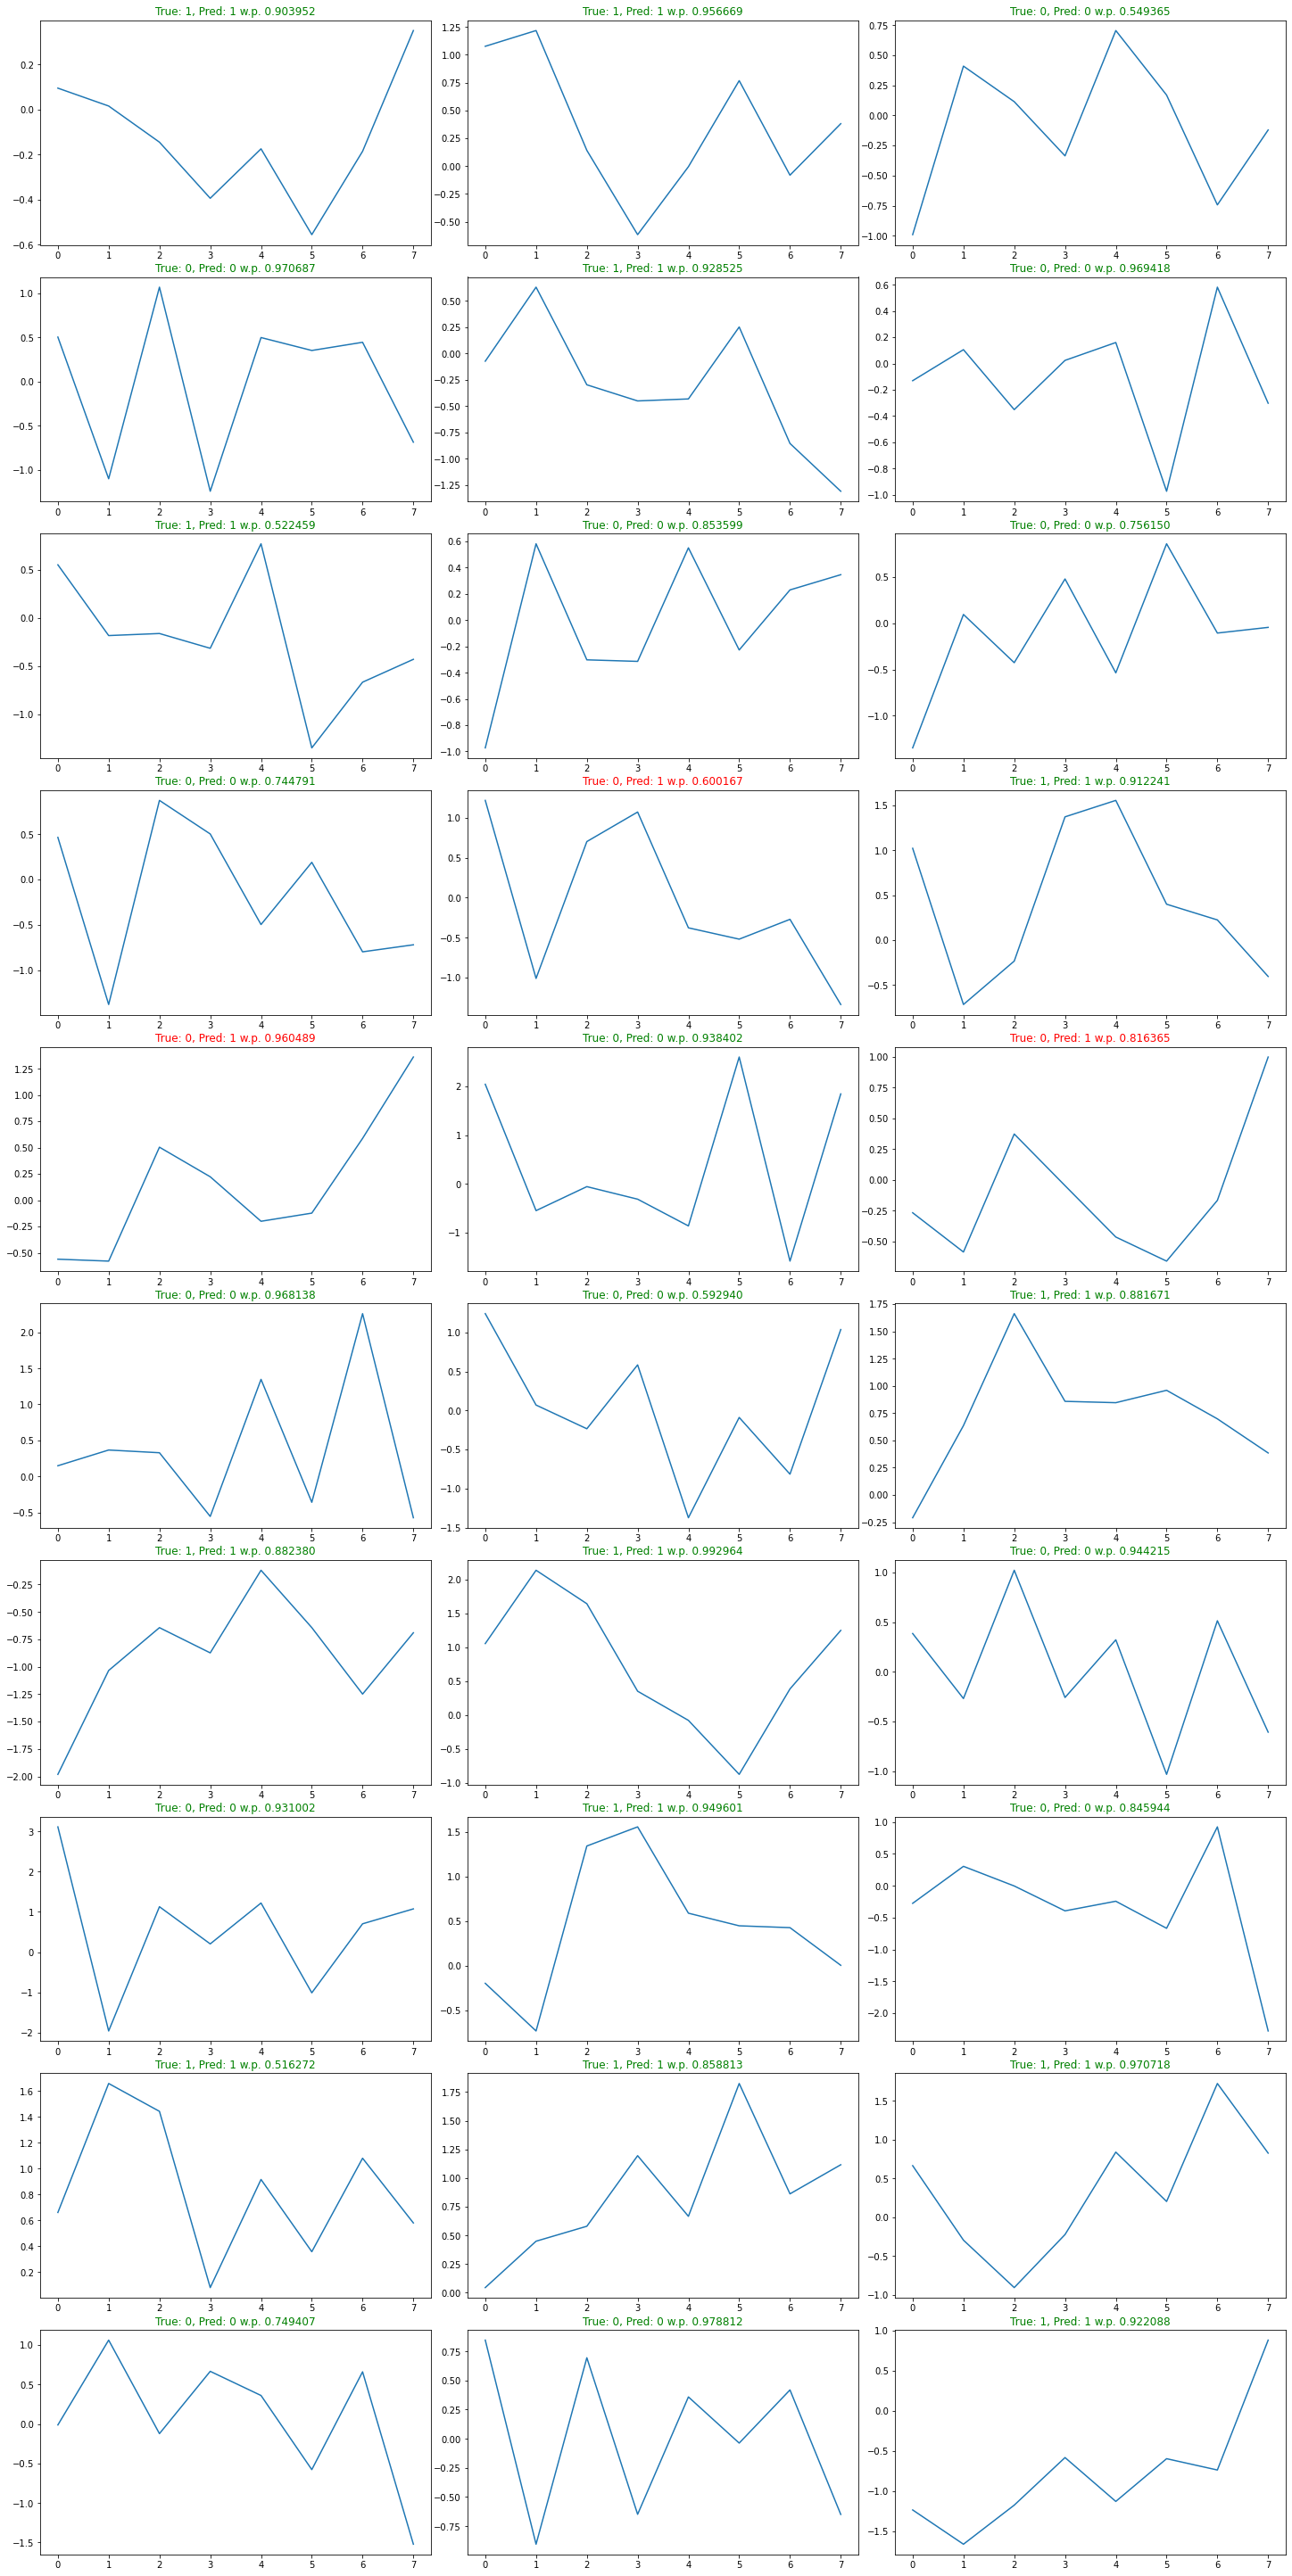

In [150]:
grid_plot(X_test, y_test, lr)

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
from scipy.stats import norm
import sequentialGOF as gof
import pandas as pd

In [2]:
real_dist = gof.CustomArProcess(ar = np.array([1, -0.7]), scale = np.sqrt(1 - 0.7**2))
generative_mod = gof.CustomArProcess(ar = np.array([1, 0.7]), scale = np.sqrt(1 - 0.7**2))

In [4]:
real_Z = gof.LongSequence(real_dist.draw(500 + 100 + 20 - 1))
real_S_set = real_Z.extract_overlap(20)

In [67]:
a = gof.DataConstructor(real_S_set, generative_mod, 500, 100, 10, 10, 20, 10, null_hyp=True)

In [68]:
a.evaluation['p'] = real_dist.true_probabilities(a.evaluation[a.seq_cols], generative_mod, 1/11, 10)

In [ ]:
real_dist.true_probabilities()

In [3]:
import sequentialGOF as gof
from tqdm.auto import tqdm
import numpy as np
import pandas as pd

In [71]:
ii = 0
alpha = 0.6
delta = 0.53
ntrain = 300
neval = 300
mtrain = [1, 5, 10]
meval = 1
L = 10
J = 5
Q = 50
sims = []

# Create MC distributions/estimation
real_dist = gof.CustomArProcess(ar = np.array([1, -alpha]), scale = np.sqrt(1 - alpha**2))
emulator_dist = gof.CustomArProcess(ar = np.array([1, -delta]), scale = np.sqrt(1 - delta**2))

for j in range(3):
    
    sim = gof.Simulation(real_dist, emulator_dist, ntrain, neval, mtrain[j], meval, L, J)

    covars = [f'x-{j}' for j in range(L-1, -1, -1)] # Get lagged covariates to use e.g. ['x-2', 'x-1', 'x'] for L = 3
    covars[L-1] = 'x'

    reg = gof.ARLogisticRegressor(columns = covars, nlags = 1)

    sim.test(regression = reg, B = Q, progress_bar = True)

    sim.data.evaluation['replication'] = ii + 1

    sims.append(sim)


In [72]:
for j in range(3):
    temp = sims[j].get_global()
    print(f'Global p-val: {temp}')

Global p-val: 0.9215686274509803
Global p-val: 0.0784313725490196
Global p-val: 0.37254901960784315


In [73]:
for j in range(3):
    temp = np.power(sims[j].p0, 2).sum()
    print(f'Sim {j}: {round(temp, 4)}')

Sim 0: 0.0022
Sim 1: 0.1126
Sim 2: 0.0091


In [74]:
np.round(np.power(sims[0].P, 2).sum(axis = 0), 4)

array([1.0800e-02, 3.3000e-03, 1.8220e-01, 1.1000e-03, 1.2800e-02,
       1.2060e-01, 3.7750e-01, 1.6070e-01, 3.4390e-01, 8.7020e-01,
       1.0000e-04, 2.0220e-01, 3.2020e-01, 5.7900e-02, 1.0380e-01,
       9.9400e-02, 0.0000e+00, 7.3800e-02, 2.9550e-01, 5.5380e-01,
       1.1710e-01, 1.5420e-01, 3.4100e-02, 1.3908e+00, 5.3820e-01,
       2.2160e-01, 2.2300e-02, 7.0000e-04, 1.6950e-01, 1.7200e-01,
       1.3830e-01, 2.7000e-03, 2.0700e-02, 5.9490e-01, 1.7330e-01,
       4.5000e-03, 4.9000e-03, 6.8000e-02, 2.6820e-01, 1.4130e-01,
       2.0970e-01, 1.2300e-02, 6.0200e-02, 3.5240e-01, 1.5250e-01,
       1.9500e-02, 3.2700e-02, 2.5220e-01, 8.6300e-02, 4.5780e-01])

Change data generator based on PCA of data

In [ ]:
class DataConstructor:
    def __init__(self, real_data, real_dist, generative_mod, ntrain, neval, mtrain, meval, L, J, null_hyp = False):
        """
             - f (function): Takes in sequence of length J, returns True if th
        """
        assert ntrain + neval <= len(real_data), f"ntrain + neval = {ntrain + neval}, len(real_data) = {len(real_data)}."

        train_data = real_data.iloc[:ntrain]
        test_data = real_data.iloc[ntrain:(ntrain+neval)].reset_index(drop = True)     

        cols = list(real_data.columns)
        self.seq_cols = cols

        def get_generated(row, m, add_label = True):
            S = row.to_numpy()
            A = S[:J]
            
            # If generating under the null, create list of all generated sequences, 
            # otherwise, use the real sequence as the first element of the list
            if null_hyp:
                seq_list = []
                m_rep = m + 1
            else:
                seq_list = [S]
                m_rep = m

            for jj in range(m_rep):
                seq_list.append(generative_mod.generate_sample_custom(nsample = L - J, starters = A))
            df = pd.DataFrame(seq_list, columns = cols)
            
            if add_label:
                labs = np.zeros(m+1, dtype = int)
                labs[0] = 1
                df['Y'] = labs
            
            return df

        # Construct training set
        T_list = []
        for row in train_data.iterrows():
            T_list.append(get_generated(row[1], mtrain))
        T = pd.concat(T_list, ignore_index = True)
        self.training = T

        # Construct evaluation set
        if neval > 0:
            V_list = []
            for row in test_data.iterrows():
                V_list.append(get_generated(row[1], meval))
            V = pd.concat(V_list, ignore_index = True)
            self.evaluation = V
        else:
            self.evaluation = None